In [2]:
# imports
import time
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig_size = [12,9]
plt.rcParams["figure.figsize"] = fig_size

plt.style.use("ggplot")




In [3]:
airports = pd.read_csv("../data/flight-delays/airports.csv")
airlines = pd.read_csv("../data/flight-delays/airlines.csv")
flights = pd.read_csv("../data/flight-delays/flights.csv")

/Users/jakubkasan/coding/data-science/flight-delays/altvenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# removing null values from key columns   
    
# flights["DEPARTURE_TIME"].dropna(axis=0,thresh=7,inplace=True)
# flights["DEPARTURE_DELAY"].dropna(axis=0,thresh=7,inplace=True)
# flights["ARRIVAL_TIME"].dropna(axis=0,thresh=7,inplace=True)
# flights["ARRIVAL_DELAY"].dropna(axis=0,thresh=7,inplace=True)
# flights["SCHEDULED_TIME"].dropna(axis=0,thresh=7,inplace=True)
binaries = ["CANCELLATION_REASON","AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"]
flights[binaries] = flights[binaries].fillna(value=0)
flights.dropna()

flights = flights.loc[(flights["CANCELLED"] != 1) & (flights["DIVERTED"] != 1) ,:]
for column in flights.columns:
    print("{}: {}".format(column,flights[column].isnull().any()))


YEAR: False
MONTH: False
DAY: False
DAY_OF_WEEK: False
AIRLINE: False
FLIGHT_NUMBER: False
TAIL_NUMBER: False
ORIGIN_AIRPORT: False
DESTINATION_AIRPORT: False
SCHEDULED_DEPARTURE: False
DEPARTURE_TIME: False
DEPARTURE_DELAY: False
TAXI_OUT: False
WHEELS_OFF: False
SCHEDULED_TIME: False
ELAPSED_TIME: False
AIR_TIME: False
DISTANCE: False
WHEELS_ON: False
TAXI_IN: False
SCHEDULED_ARRIVAL: False
ARRIVAL_TIME: False
ARRIVAL_DELAY: False
DIVERTED: False
CANCELLED: False
CANCELLATION_REASON: False
AIR_SYSTEM_DELAY: False
SECURITY_DELAY: False
AIRLINE_DELAY: False
LATE_AIRCRAFT_DELAY: False
WEATHER_DELAY: False


In [5]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


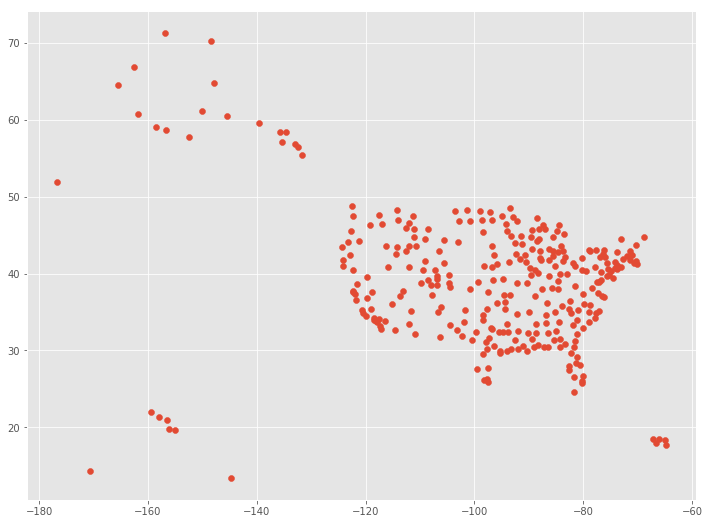

In [6]:
# Plot a map of the USA with the airports

plt.scatter(airports["LONGITUDE"],airports["LATITUDE"])
plt.show()

In [9]:
# Get the Mean, std Dev, and 25%-75% quantiles of the delays per airline

airline_stats = airlines.set_index("IATA_CODE").T.to_dict()

for key in airline_stats.keys():
    departure_delays = flights.loc[flights["AIRLINE"] == key , "DEPARTURE_DELAY"].dropna()
    arrival_delays = flights.loc[flights["AIRLINE"] == key , "ARRIVAL_DELAY"].dropna()
    airline_stats[key]["departure_delay_average"] = np.mean(departure_delays)
    airline_stats[key]["arrival_delay_average"] = np.mean(arrival_delays)
    airline_stats[key]["departure_delay_stdev"] = np.std(departure_delays)
    airline_stats[key]["arrival_delay_stdev"] = np.std(arrival_delays)
    airline_stats[key]["departure_delay_25per"] = np.percentile(departure_delays,25)
    airline_stats[key]["arrival_delay_25per"] = np.percentile(arrival_delays,25)
    airline_stats[key]["departure_delay_75per"] = np.percentile(departure_delays,75)
    airline_stats[key]["arrival_delay_75per"] = np.percentile(arrival_delays,75)
    
airline_stats = pd.DataFrame.from_dict(airline_stats,orient="index")

Enter some text here...

In [7]:
# same as above but for airport

airport_stats = airports.set_index("IATA_CODE").T.to_dict()


for key in airport_stats.keys():
    arrival_delays = flights.loc[flights["DESTINATION_AIRPORT"] == key , "ARRIVAL_DELAY"].dropna()
    departure_delays = flights.loc[flights["ORIGIN_AIRPORT"] == key , "DEPARTURE_DELAY"].dropna()
    airport_stats[key]["departure_delay_average"] = np.mean(departure_delays)
    airport_stats[key]["arrival_delay_average"] = np.mean(arrival_delays)
    airport_stats[key]["departure_delay_stdev"] = np.std(departure_delays)
    airport_stats[key]["arrival_delay_stdev"] = np.std(arrival_delays)
    airport_stats[key]["departure_delay_25per"] = np.percentile(departure_delays,25)
    airport_stats[key]["arrival_delay_25per"] = np.percentile(arrival_delays,25)
    airport_stats[key]["departure_delay_75per"] = np.percentile(departure_delays,75)
    airport_stats[key]["arrival_delay_75per"] = np.percentile(arrival_delays,75)

airport_stats = pd.DataFrame.from_dict(airport_stats,orient="index")

In [10]:
airline_stats.sort_values(by=["departure_delay_average"]).loc[:,["AIRLINE","departure_delay_average"]]

,AIRLINE,departure_delay_average
HA,Hawaiian Airlines Inc.,0.469918
AS,Alaska Airlines Inc.,1.718926
US,US Airways Inc.,6.081000
DL,Delta Air Lines Inc.,7.313300
OO,Skywest Airlines Inc.,7.736083
EV,Atlantic Southeast Airlines,8.615598
AA,American Airlines Inc.,8.826106
VX,Virgin America,8.993486
MQ,American Eagle Airlines Inc.,9.967187
WN,Southwest Airlines Co.,10.517183


In [11]:
airline_stats.sort_values(by=["arrival_delay_average"]).loc[:,["AIRLINE","arrival_delay_average"]]

,AIRLINE,arrival_delay_average
AS,Alaska Airlines Inc.,-0.976563
DL,Delta Air Lines Inc.,0.186754
HA,Hawaiian Airlines Inc.,2.023093
AA,American Airlines Inc.,3.451372
US,US Airways Inc.,3.706209
WN,Southwest Airlines Co.,4.374964
VX,Virgin America,4.737706
UA,United Air Lines Inc.,5.431594
OO,Skywest Airlines Inc.,5.845652
MQ,American Eagle Airlines Inc.,6.457873


In [12]:
airport_stats.sort_values(by=["departure_delay_average"],ascending=True).loc[:,["AIRPORT","departure_delay_average"]].head(20)

,AIRPORT,departure_delay_average
YAK,Yakutat Airport,-6.507692
CNY,Canyonlands Field,-6.058537
EKO,Elko Regional Airport,-3.771760
VEL,Valdez Airport,-3.740000
CDV,Merle K. (Mudhole) Smith Airport,-3.268405
LWS,Lewiston-Nez Perce County Airport,-2.976190
PIH,Pocatello Regional Airport,-1.328221
SCC,Deadhorse Airport (Prudhoe Bay Airport),-0.949755
ITO,Hilo International Airport,-0.889804
TWF,Magic Valley Regional Airport (Joslin Field),-0.875776


In [13]:
airport_stats.sort_values(by=["departure_delay_average"],ascending=False).loc[:,["AIRPORT","departure_delay_average"]].head(20)

,AIRPORT,departure_delay_average
ILG,Wilmington Airport,29.568421
MVY,Martha's Vineyard Airport,25.907317
HYA,Barnstable Municipal Airport,23.182927
STC,St. Cloud Regional Airport,18.389610
OTH,Southwest Oregon Regional Airport (North Bend ...,17.806818
ASE,Aspen-Pitkin County Airport,17.394729
CEC,Del Norte County Airport (Jack McNamara Field),17.184971
GST,Gustavus Airport,17.171053
BPT,Jack Brooks Regional Airport (Southeast Texas ...,17.020994
GUM,Guam International Airport,16.483384


In [14]:
airport_stats.sort_values(by=["arrival_delay_average"],ascending=True).loc[:,["AIRPORT","arrival_delay_average"]].head(20)

,AIRPORT,arrival_delay_average
VEL,Valdez Airport,-13.761421
CNY,Canyonlands Field,-11.575610
IMT,Ford Airport,-7.601639
BLI,Bellingham International Airport,-6.803419
LWS,Lewiston-Nez Perce County Airport,-6.544369
INL,Falls International Airport,-5.409171
DLG,Dillingham Airport,-4.194805
BTM,Bert Mooney Airport,-3.962500
BRD,Brainerd Lakes Regional Airport,-3.615780
ABR,Aberdeen Regional Airport,-3.389650


In [15]:
airport_stats.sort_values(by=["arrival_delay_average"],ascending=False).loc[:,["AIRPORT","arrival_delay_average"]].head(20)

,AIRPORT,arrival_delay_average
STC,St. Cloud Regional Airport,23.025974
ILG,Wilmington Airport,21.989474
TTN,Trenton Mercer Airport,17.433901
GUM,Guam International Airport,17.320242
OTH,Southwest Oregon Regional Airport (North Bend ...,16.740602
MQT,Sawyer International Airport,16.152027
ASE,Aspen-Pitkin County Airport,15.829448
PBG,Plattsburgh International Airport,15.288256
BPT,Jack Brooks Regional Airport (Southeast Texas ...,14.631694
BQN,Rafael Hernández Airport,12.192771


In [ ]:
# plot the delays for both departures and arrivals
figure, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax[0].scatter(airport_stats["LONGITUDE"],airport_stats["LATITUDE"],c=airport_stats["departure_delay_average"],cmap="RdYlGn",alpha=0.6,s=50)
ax[1].scatter(airport_stats["LONGITUDE"],airport_stats["LATITUDE"],c=airport_stats["arrival_delay_average"],cmap="RdYlGn",alpha=0.6,s=50)
ax[0].set_title("Departure Delays")
ax[1].set_title("Arrival Delays")
plt.show()

In [ ]:
# plot the average delays by week

# arrivals
dow_arrivals = {}

dow_key = {
    "Monday":1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}

for day in dow_key.keys():
    # get all the flights of that particular day
    data = flights.loc[flights["DAY_OF_WEEK"] == dow_key[day],"ARRIVAL_DELAY"]
    dow_arrivals["{}".format(str(day))] = {
        "Mean": np.mean(data),
        "Std Dev": np.std(data)
    }
# departures

dow_departures = {}

for day in dow_key.keys():
    # get all the flights of that particular day
    data = flights.loc[flights["DAY_OF_WEEK"] == dow_key[day],"DEPARTURE_DELAY"]
    dow_departures["{}".format(str(day))] = {
        "Mean": np.mean(data),
        "Std Dev": np.std(data)
    }

dow_departures = pd.DataFrame.from_dict(dow_departures,orient="index")
dow_arrivals = pd.DataFrame.from_dict(dow_arrivals,orient="index")


In [ ]:
# plot the day-of-week values

#dow_departures = dow_departures.reindex(dow_key.keys())
#dow_arrivals = dow_arrivals.reindex(dow_key.keys())

figure, ax = plt.subplots(ncols=2, nrows=1,figsize=(15,4))


dow_departures["Mean"].plot(kind="bar",ax=ax[0],title="Average Day-of-Week Departures")
dow_arrivals["Mean"].plot(kind="bar",ax=ax[1],title="Average Day-of-Week Arrivals")

plt.show()



In [ ]:
flights.columns

In [ ]:
airports.head()

In [ ]:
# Can we predict the landing delay using the preceeding delays

def getPrevFlights(airport, scheduled_landing, flights):
    # assemble query
    query = flights.loc[(flights["DESTINATION_AIRPORT"] == airport) & (flights["SCHEDULED_ARRIVAL"] < scheduled_landing) & (flights["ARRIVAL_TIME"] < scheduled_landing ) ,:]

In [ ]:
# convert times

def createTime(string):
    negative = False
    string = int(string)
    if string < 0:
        negative = True
        string *= -1
    strtime = [str(int(x)) for x in str(string)]
    time = (["0","0","0"] + strtime)[(-4):]
    hours = int(''.join(time[:2]))
    minutes = int(''.join(time[2:]))
    if negative:
        return -hours,-minutes
    else:
        return hours,minutes 

def createDates(row):
    # get hours and minutes
    hours,minutes = createTime(row["SCHEDULED_DEPARTURE"])
    scheduled_departure = dt.datetime(row["YEAR"],row["MONTH"],row["DAY"],hours,minutes)
    #hours,minutes = createTime(row["DEPARTURE_DELAY"])
    actual_departure = scheduled_departure + dt.timedelta(minutes=int(row["DEPARTURE_DELAY"]))
    #hours,minutes = createTime(row["SCHEDULED_TIME"])
    scheduled_arrival = actual_departure + dt.timedelta(minutes=int(row["SCHEDULED_TIME"]))
    #hours,minutes = createTime(row["ARRIVAL_DELAY"])
    actual_arrival = scheduled_departure + dt.timedelta(minutes=int(row["ARRIVAL_DELAY"]))
    
    arrival_delay = (scheduled_arrival - actual_arrival).total_seconds()/60
    departure_delay = (scheduled_departure - actual_departure).total_seconds()/60 
    
    row["SCHEDULED_DEPARTURE"] = scheduled_departure
    row["ACTUAL_DEPARTURE"] = actual_departure
    row["DEPARTURE_DELAY"] = departure_delay
    row["SCHEDULED_ARRIVAL"] = scheduled_arrival
    row["ACTUAL_ARRIVAL"] = actual_arrival
    row["ARRIVAL_DELAY"] = arrival_delay

    return row

def altCreateDates(row):
    hours, minutes = createTime(row["SCHEDULED_DEPARTURE"])
    row["SCHEDULED_DEPARTURE_HOUR"] = hours
    row["SCHEDULED_DEPARTURE_MINUTE"] = minutes
    return


flights = flights.apply(createDates,axis=1)

In [ ]:
flights.loc[(-35):,["YEAR","MONTH","DAY","SCHEDULED_DEPARTURE","DEPARTURE_TIME","DEPARTURE_DELAY","SCHEDULED_ARRIVAL","ARRIVAL_TIME","ARRIVAL_DELAY"]]

In [ ]:
"2".split()

In [ ]:
flights["DEPARTURE_DELAY"].head(40)

In [ ]:
dt.timedelta(minutes=0)

In [ ]:
flights.iloc[32,:]

In [8]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [17]:
import sys

In [47]:
flights.loc[(flights["DESTINATION_AIRPORT"] == "ABR") | (flights["ORIGIN_AIRPORT"] == "ABR"),["DESTINATION_AIRPORT","ORIGIN_AIRPORT"]].drop_duplicates()

def getConnections(row):
    query = flights.loc[(flights["DESTINATION_AIRPORT"] == row["IATA_CODE"]) | (flights["ORIGIN_AIRPORT"] == row["IATA_CODE"]),["DESTINATION_AIRPORT","ORIGIN_AIRPORT"]]
    #print("Number of Connections = {}".format(query.drop_duplicates().shape[0]))
    #print("Number of flights per day = {}".format(query.shape[0]/365))
    row["connections"] = query.drop_duplicates().shape[0]
    row["flights_per_day"] = query.shape[0]/365
    return row
    

airports = airports.apply(getConnections,axis=1)

In [48]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,connections,flights_per_day
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,6,12.183562
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,2,12.205479
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,46,103.756164
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,2,3.616438
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,2,4.739726


In [64]:
# one hot encoding

def getBinaries(binaries,df):
    for binary in binaries:
        for element in df[binary].unique():
            df["{}_{}_binary".format(binary,element)] = df[binary].apply(lambda x: 1 if x == element else 0)
        print("Completed {}".format(binary))
    return df



In [55]:
flights["AIRLINE"].unique()[1]

'AA'

In [65]:
flights = getBinaries(["DESTINATION_AIRPORT"],flights)

KeyboardInterrupt: 

(322, 9)